<a href="https://colab.research.google.com/github/kalpeshgithub10/Projects/blob/master/HOUSE_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
df.shape

(506, 15)

In [5]:
#Dropping unnecessary column 
df = df.drop('Unnamed: 0' , axis = 1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


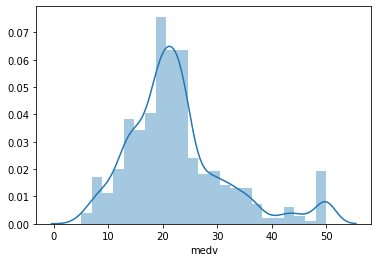

In [7]:
sns.distplot(df['medv'])

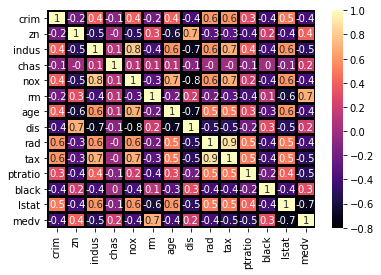

In [8]:
nwdf = df.corr().round(1)
sns.heatmap(nwdf, annot = True, cmap = plt.cm.magma, linewidths=2 , linecolor = 'black')

From the heatmap we can see that the rm = 0.7 (strong positive correlation) and lstat = -0.74 (strong negative correlation) so we will choose these two columns as feature variables.

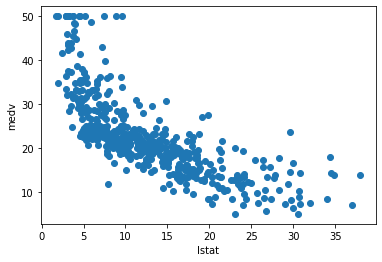

In [9]:
plt.scatter(df['lstat'], df['medv'])
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

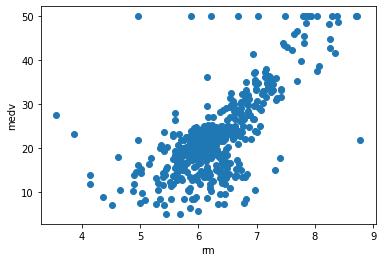

In [10]:
plt.scatter(df['rm'], df['medv'])
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()

In [11]:
#SELECT THE FEATURE VARIABLES
X = df[['rm','lstat']].values
X[0:5]

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       [6.998, 2.94 ],
       [7.147, 5.33 ]])

In [12]:
#NORMALIZE THE FEATURES
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.41367189, -1.0755623 ],
       [ 0.19427445, -0.49243937],
       [ 1.28271368, -1.2087274 ],
       [ 1.01630251, -1.36151682],
       [ 1.22857665, -1.02650148]])

In [13]:
#SELECT THE TARGET VARIABLE
y = df['medv']
y[0:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [14]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 5 )
print("Train size : ", X_train.shape, y_train.shape)
print("Test size : ", X_test.shape, y_test.shape)

Train size :  (404, 2) (404,)
Test size :  (102, 2) (102,)


In [15]:
#MODEL BUILDING AND TRAINING
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
print(clf.intercept_,clf.coef_)

22.503717285747477 [ 3.22139499 -5.11671673]


In [16]:
#PREDICTION OR TESTING
y_hat = clf.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

[37.38999403 29.79290611 25.86755297  0.31370828 33.31385559]
226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
Name: medv, dtype: float64


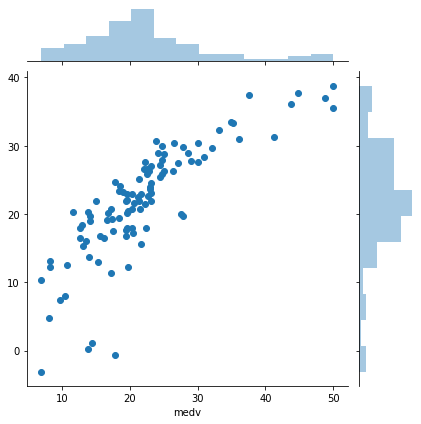

In [17]:
sns.jointplot(x = y_test, y = y_hat, data = df)

In [18]:
#EVALUATION CRITERIA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R2 score: %.2f" % r2_score(y_hat,y_test))
print("Mean Absolute Error: %.2f" %mean_absolute_error(y_test,y_hat))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test,y_hat)))


R2 score: 0.61
Mean Absolute Error: 3.79
Root Mean Squared Error: 5.14
